<a href="https://colab.research.google.com/github/eduardarsimoes/lae1/blob/main/Estacoes/EstacoesES_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASET: Estações climáticas ES**
---
### **LAB. EXTENSÃO 2020/2 EAD** - Eduarda Simões, Serenna Ferrari e Thaís de Souza

### Importando bibliotecas e respectivos módulos

In [ ]:
import sys

!"{sys.executable}" -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
# Importando bibliotecas
import sklearn as skl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas_profiling import ProfileReport
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer


### Carregando dataset e resumo de dados

---



In [ ]:
url = "https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/estacoes_es_summary.csv"

dataset = pd.read_csv(url, header=0)
# ETP = Evapotranspiração potencial | ETR = Evapotranspiração real | DEF = Deficiência hídrica (ETP - ETR) | EXC = Excedente hídrico
# Exc pode ser 0
pd.pandas.set_option('display.max_columns', None)
print(dataset.head())


                Municipios  Altitude  X_coord  Y_coord        CHUVA  \
0  EstacaoMeteorologicaES1        66   -39.96   -18.30  1036.980000   
1  EstacaoMeteorologicaES2         3   -39.75   -18.56  1164.716667   
2  EstacaoMeteorologicaES3         6   -39.76   -18.95  1394.900000   
3  EstacaoMeteorologicaES4       180   -40.75   -18.99  1250.843333   
4  EstacaoMeteorologicaES5        90   -40.09   -18.49  1127.650000   

           ETP          ETR         DEF        EXC    ER/ETP  TEMP_MÉD_ANUAL  
0  1382.294237  1036.980000  345.314237   0.000000  0.750188       24.849550  
1  1413.227948  1164.716667  248.511281   0.000000  0.824153       25.061532  
2  1397.763967  1298.498162   99.265805  96.401838  0.928982       24.959973  
3  1341.710579  1151.705054  190.005525  99.138279  0.858386       24.529823  
4  1367.365007  1127.650000  239.715007   0.000000  0.824688       24.743049  


### Pré processamento

In [ ]:
#GERANDO O PROFILING REPORT (EDA)
profile = ProfileReport(dataset, html={"style": {"full_width": True}}, sort="None") 
#profile.to_widgets()
profile.to_file('estacoesES_raw.html')

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_notebook_iframe()

In [ ]:
#REMOVENDO ATRIBUTOS
dataset.drop(["Municipios","ER/ETP"], axis = 1, inplace = True) #axis = 1 (toda coluna) | inplace = True (replace)
print(dataset.head())

   Altitude  X_coord  Y_coord        CHUVA          ETP          ETR  \
0        66   -39.96   -18.30  1036.980000  1382.294237  1036.980000   
1         3   -39.75   -18.56  1164.716667  1413.227948  1164.716667   
2         6   -39.76   -18.95  1394.900000  1397.763967  1298.498162   
3       180   -40.75   -18.99  1250.843333  1341.710579  1151.705054   
4        90   -40.09   -18.49  1127.650000  1367.365007  1127.650000   

          DEF        EXC  TEMP_MÉD_ANUAL  
0  345.314237   0.000000       24.849550  
1  248.511281   0.000000       25.061532  
2   99.265805  96.401838       24.959973  
3  190.005525  99.138279       24.529823  
4  239.715007   0.000000       24.743049  


### Separando conjuntos de dados

In [ ]:
#SEPARANDO
Y = dataset['TEMP_MÉD_ANUAL']
X = dataset['Altitude']

In [ ]:
d = {'altitude': X, 'temperatura': Y}
df = pd.DataFrame(data=d)
df

altitude  temperatura
0          66    24.849550
1           3    25.061532
2           6    24.959973
3         180    24.529823
4          90    24.743049
..        ...          ...
105       540    22.286776
106       650    19.805973
107        15    23.532368
108        20    23.498652
109        59    26.179975

[110 rows x 2 columns]

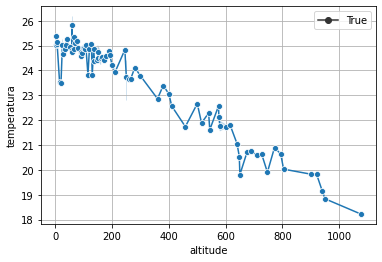

In [ ]:
#DISTRIBUIÇÃO DOS PONTOS
plt.grid(True)
grafico = sns.lineplot(data = df, x = 'altitude', y = 'temperatura', markers = True, style = True)

In [ ]:
X = df.iloc[:,:1].values
y = df.temperatura.values

### Criando modelo

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Obtendo valores estimados

In [ ]:
y_pred = model.predict(X)
y_pred

array([24.95943518, 25.36274335, 25.3435382 , 24.22963944, 24.80579397,
       24.15281884, 23.58946774, 24.99784548, 24.16562227, 23.4614334 ,
       24.1016051 , 24.76738367, 23.4614334 , 22.8212617 , 24.76738367,
       24.7417768 , 24.86981114, 24.7417768 , 19.62040321, 22.18109   ,
       25.36274335, 24.3256652 , 24.42809267, 25.34993991, 25.06186265,
       25.12587982, 25.06186265, 24.5177167 , 21.06078953, 24.93382831,
       24.29365661, 24.93382831, 20.96476377, 25.01064891, 25.06186265,
       24.77378538, 24.86981114, 24.93382831, 23.78151925, 24.35767378,
       21.5409183 , 24.86981114, 24.93382831, 25.3435382 , 25.22190557,
       25.12587982, 20.83672943, 19.36433453, 25.3435382 , 24.35767378,
       22.08506425, 21.89941445, 24.86981114, 24.1016051 , 21.28484962,
       23.6854935 , 22.75724453, 25.36274335, 20.23496804, 24.89541801,
       21.69455951, 24.69696478, 24.56893044, 21.66895264, 21.5409183 ,
       21.44489255, 20.43982298, 21.5409183 , 20.29898521, 19.49

### Métricas

In [ ]:
# MSE
print("MSE      = {0:.3f}".format(mean_squared_error(y, y_pred)))

# R²
print("R² score = {0:.3f}".format(r2_score(y, y_pred)))

MSE = 0.224
R² score = 0.931


### Estimação

In [ ]:
#COEFICIENTES
b0 = model.intercept_
b1 = model.coef_[0]
print("Coeficiente Linear (b0)  = {}\nCoeficiente Angular (b1) = {}".format(b0,b1))

Coeficiente Linear (b0) = 25.381948498880043
Coeficiente Angular (b1) = -0.006401716992726068


In [ ]:
#VERIFICANDO CADA LINHA
for indice in range(len(df)):
  x = df.loc[indice]['altitude']
  temperatura_real = df.loc[indice]['temperatura']
  predito = b0 + b1*x
  predito
  print("Altitude            = {}\nTemperatura predita = {}\nTemperatura real    = {}\nResíduo             = {}\n\n".format(x, predito, temperatura_real, temperatura_real - predito))

Altitude            = 66.0
Temperatura predita = 24.95943517736012
Temperatura real    = 24.8495505
Resíduo             = -0.10988467736012097


Altitude            = 3.0
Temperatura predita = 25.362743347901866
Temperatura real    = 25.0615323333333
Resíduo             = -0.30121101456856536


Altitude            = 6.0
Temperatura predita = 25.343538196923685
Temperatura real    = 24.9599734166667
Resíduo             = -0.3835647802569859


Altitude            = 180.0
Temperatura predita = 24.22963944018935
Temperatura real    = 24.5298230833333
Resíduo             = 0.30018364314395285


Altitude            = 90.0
Temperatura predita = 24.805793969534697
Temperatura real    = 24.74304925
Resíduo             = -0.06274471953469885


Altitude            = 192.0
Temperatura predita = 24.152818836276637
Temperatura real    = 24.61265575
Resíduo             = 0.4598369137233611


Altitude            = 280.0
Temperatura predita = 23.589467740916742
Temperatura real    = 24.11697275
Resíduo

### Gráfico resultado

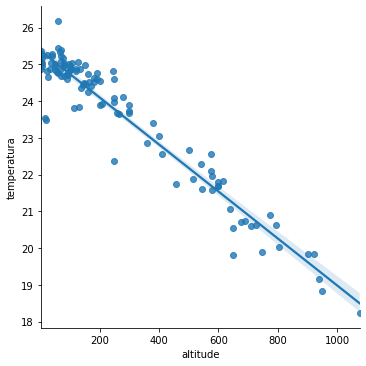

In [ ]:
result = sns.lmplot(x = 'altitude', y = 'temperatura', data = df)